In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 17.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Loading the model which was trained on PCB data

In [3]:
model = YOLO('/kaggle/input/yolo8v_model_trained/tensorflow2/default/1/pcb_detection_yolov8_model.pt')  # Adjust the path to your model

## Visualizing the predictions


0: 640x640 3 defects, 1187.4ms
Speed: 24.3ms preprocess, 1187.4ms inference, 27.3ms postprocess per image at shape (1, 3, 640, 640)


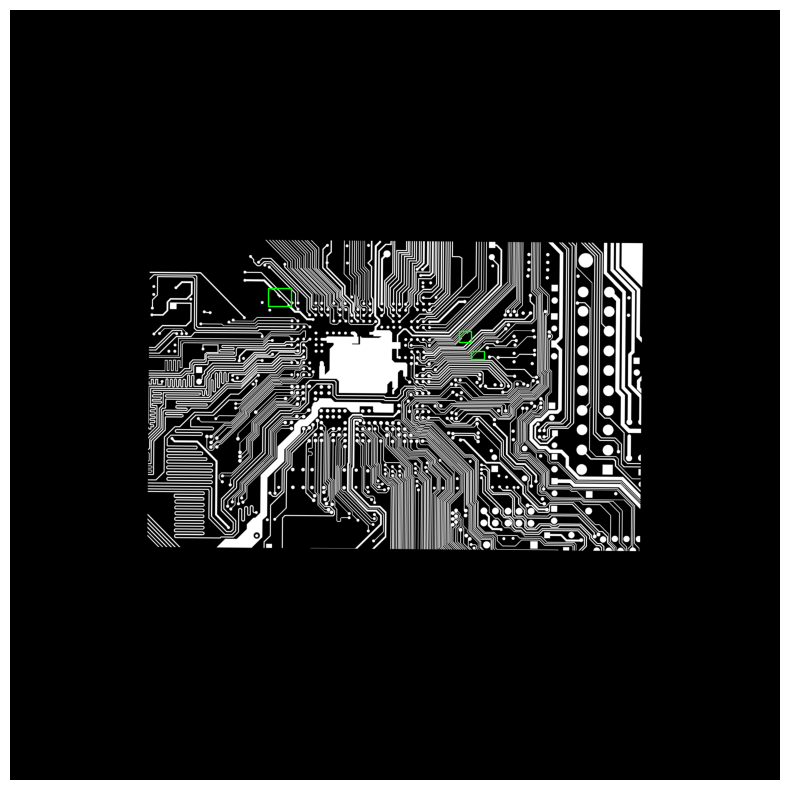


0: 640x640 3 defects, 979.5ms
Speed: 4.6ms preprocess, 979.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


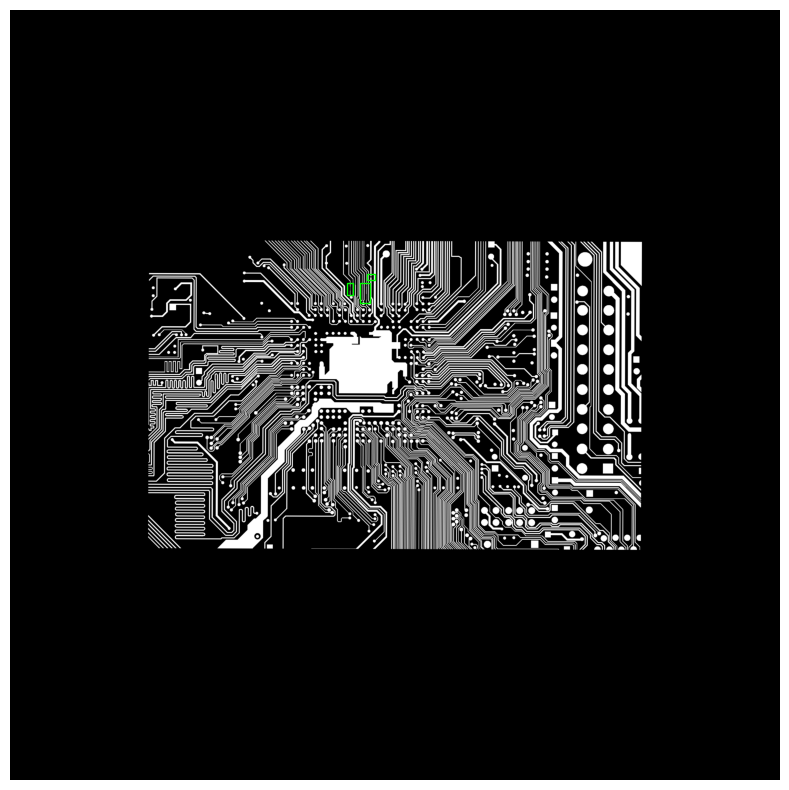


0: 640x640 4 defects, 1011.4ms
Speed: 4.6ms preprocess, 1011.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


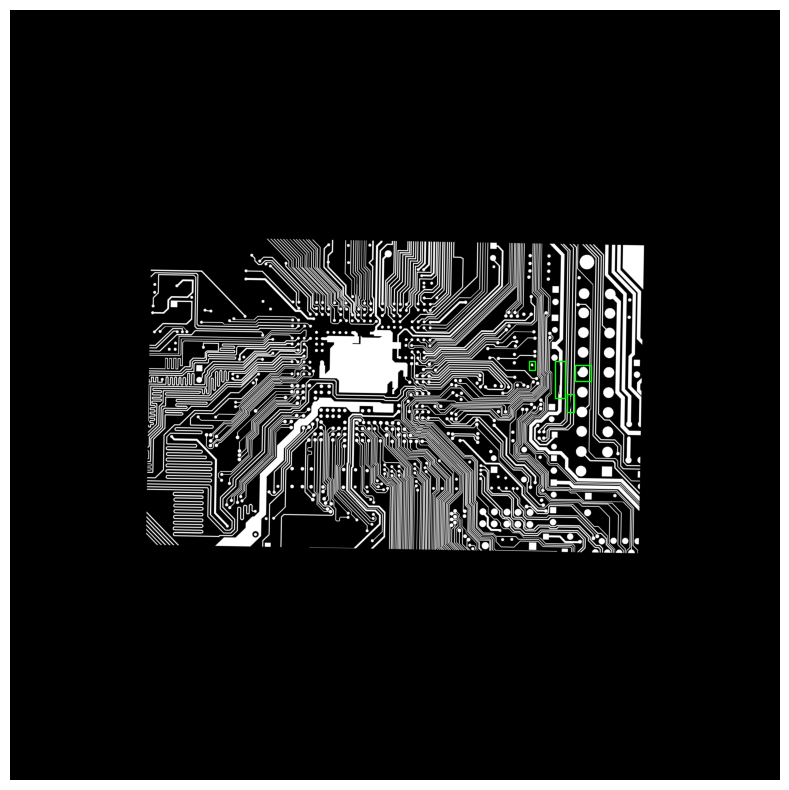

In [4]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
from ultralytics import YOLO

# List of image paths 
image_paths = [
    '/kaggle/input/testing-image/test_set/pcb1_defect_image_1.png',
    '/kaggle/input/testing-image/test_set/pcb2_defect_image_1_.png',
    '/kaggle/input/testing-image/test_set/pcb3_defect_image_1.png',
    
]

# Iterate over the images and visualize the results
for img_path in image_paths:
    img = cv2.imread(img_path)
    
    # Run YOLO predictions on the image
    results = model(img)  # Get YOLO predictions
    
    # Get the original image from results (for correct aspect ratio)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get bounding boxes for visualizing
    boxes = results[0].boxes.xyxy.cpu().numpy()  # for bounding box coordinates in [x1, y1, x2, y2] format
    
    # Create a figure to display the image with bounding boxes
    fig, ax = plt.subplots(1, figsize=(12, 8))
   # fig, ax = plt.subplots(1, figsize=(img.shape[1] // 50, img.shape[0] // 50))  # Scale the figure to match the image's aspect ratio
    ax.imshow(img_rgb)  # Display the image
    
    # Draw bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = box  # Unpack the coordinates

        # Draw the bounding box with a desired color and thickness
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,  # Position and size of the box
            linewidth=1, edgecolor='lime', facecolor='none'  
        )
        ax.add_patch(rect)  
    
    # Turn off axis for cleaner visualization
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()


In [5]:
results = model.predict('/kaggle/input/data-val/val')


image 1/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 10.png: 640x640 3 defects, 988.1ms
image 2/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 11.png: 640x640 3 defects, 1049.5ms
image 3/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 12.png: 640x640 3 defects, 1021.6ms
image 4/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 13.png: 640x640 3 defects, 1010.5ms
image 5/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 14.png: 640x640 3 defects, 1011.7ms
image 6/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 15.png: 640x640 3 defects, 975.9ms
image 7/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 16.png: 640x640 3 defects, 991.1ms
image 8/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 17.png: 640x640 3 defects, 1122.2ms
image 9/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 2.png: 640x640 3 defects, 1053.2ms
image 10/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 3.png: 640x640 3 defects, 1005.2ms
image 11/60 /